# Neural networks
## Problem 2.1: binary classification
- Train the given binary classification model
- Evaluate the model performance
- Evaluate the classification quality

### Load Python modules

In [29]:
import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt 
from matplotlib import cm
from matplotlib.colors import Normalize

from tqdm.notebook import tqdm
from torch import nn
import numpy as np

### Load and preprocess data

In [30]:
# load data
x=np.load('data/features_15_18.npy') 
t=np.load('data/labels_15_18.npy')

x=x.T
t = t[:,None]

# set labels to 0 and 1
for i,label in enumerate(np.unique(t)):
    t[t == label] = i

print(x.shape)
print(t.shape)

(2002, 2)
(2002, 1)


### Split to training, validation and test data

In [31]:
np.random.seed(1)
indices = np.random.permutation(x.shape[0])
n = len(indices)

# split
training_idx, test_idx, val_idx = indices[:round(0.6*n)], indices[round(0.6*n):round(0.8*n)], indices[round(0.8*n):]
x_tr, x_te, x_vl  = x[training_idx,:], x[test_idx,:], x[val_idx,:]
t_tr, t_te, t_vl  = t[training_idx,:], t[test_idx,:], t[val_idx,:]

# convert to pytorch tensors
xtr = torch.tensor(x_tr, dtype=torch.float)
xte = torch.tensor(x_te, dtype=torch.float)
xvl = torch.tensor(x_vl, dtype=torch.float)
ttr = torch.tensor(t_tr, dtype=torch.float)
tte = torch.tensor(t_te, dtype=torch.float)
tvl = torch.tensor(t_vl, dtype=torch.float)

### Train neural network

#### Initialize parameters for learning 

In [32]:
num_epochs = 10000  
learning_rate = 5e-3 

#### Define helper function
Takes `torch.nn.Module` as an input and applies the specified weight initialization

In [33]:
# takes in a module and applies the specified weight initialization
def weights_init_uniform(m):
    classname = m.__class__.__name__
    # for every Linear layer in a model..
    if classname.find('Linear') != -1:
        # apply a uniform distribution to the weights and a bias=0
        m.weight.data.uniform_(-0.01, 0.01)
        m.bias.data.fill_(0)       

#### Set number of hidden units

In [34]:
hidden_size = 1   # make changes here to increase the model complexity

#### Define empty arrays to save the performance evaluation measures

In [35]:
e_tr = np.empty(num_epochs)   # training loss
e_te = np.empty(num_epochs)   # test loss
e_vl = np.empty(num_epochs)   # validation loss

#### Build the model: define the neural network

In [36]:
input_size = xtr.shape[1] 
model = nn.Sequential(nn.Linear(input_size, hidden_size),
                      nn.Sigmoid(),
                      nn.Linear(hidden_size, 1),
                      nn.Sigmoid())

model.apply(weights_init_uniform)

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=5, out_features=1, bias=True)
  (3): Sigmoid()
)

#### Define loss and optimizer

For the binary classification we use the cross-entropy loss function:

$$J(\mathbf{w}) = -\frac{1}{n}\sum\limits_{i=1}^n\left[y_i\log q_i + (1 - y_i)\log(1-q_i)\right]$$

which is available in `pytorch` as `nn.BCELoss`.

As an optimizer we suggest to use `Adam` - stochastic gradient-based optimization method. See the [arxive paper](https://arxiv.org/abs/1412.6980) for more details.

In [37]:
criterion = nn.BCELoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 

#### Run training of the neural network

In [38]:
for epoch in tqdm(range(num_epochs)):
    # Get our predictions
    otr = model(xtr)
    
    loss = criterion(otr, ttr)
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() 
  
    # save the performance evaluation measures
    e_tr[epoch] = loss
    e_te[epoch] = criterion(model(xte), tte)
    e_vl[epoch] = criterion(model(xvl), tvl)

  0%|          | 0/10000 [00:00<?, ?it/s]

### Plot training performance evaluation measures

Run the code below and evaluate the resulting plot:
- How Training/Test/Validation loss changes with the epoch?
- Which loss is higher in the beginning of the training?
- Which loss is higher at the end of the training?
- What does it tell you about performance of your model?

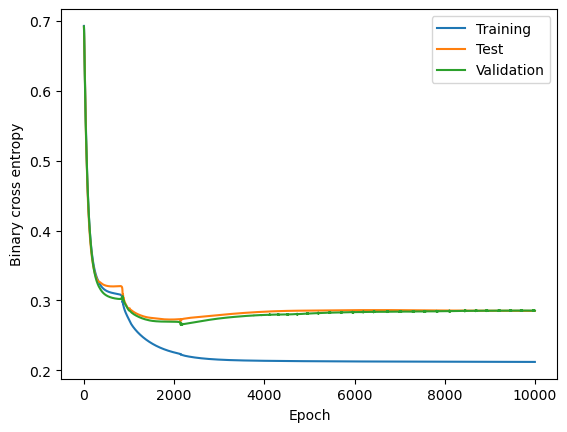

In [39]:
fig = plt.figure()
ax = plt.axes()
plt.plot(e_tr, label='Training')
plt.plot(e_te, label='Test')
plt.plot(e_vl, label='Validation')
plt.xlabel("Epoch")
plt.ylabel("Binary cross entropy")
plt.legend();

### Visualize the classification result

Run the code below to visualize the classification result. 
- How do you evaluate the quality of classification? Why?
- What should be done to improve the quality of classification? Why?

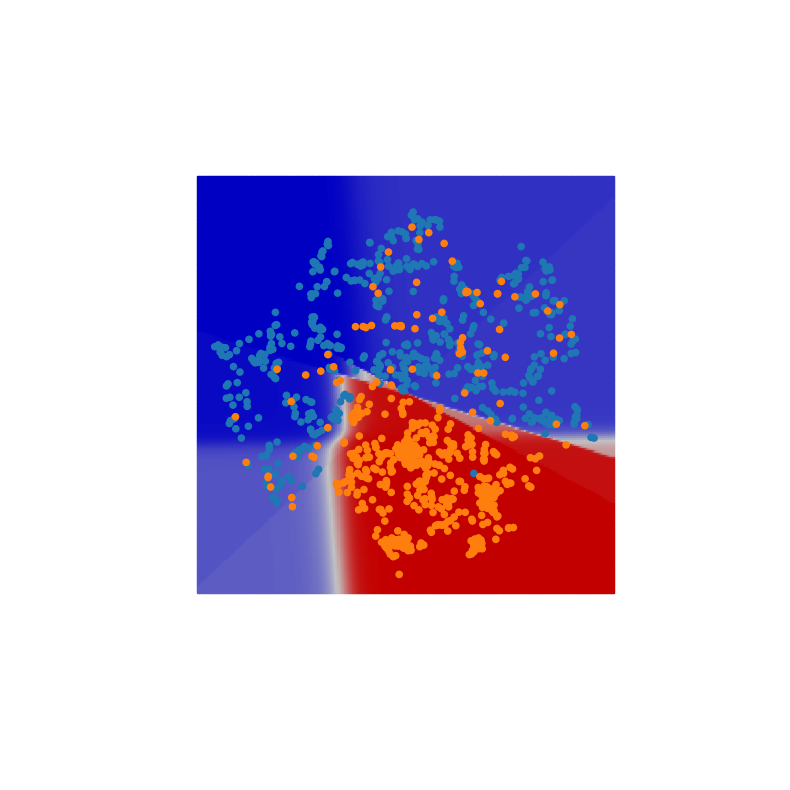

In [40]:
x1 = np.arange(-100, 100, 1)
x2 = np.arange(-100, 100, 1)
X1, X2 = np.meshgrid(x1, x2)
X = torch.tensor(np.vstack((X1.flatten(),X2.flatten())).T, dtype=torch.float)
Z =  model(X).reshape(X1.shape).detach().numpy()

colormap = cm.bwr
scalarMap = cm.ScalarMappable(norm=Normalize(vmin=Z.min(), vmax=Z.max()), cmap=colormap)

Z_colored = scalarMap.to_rgba(Z)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection = '3d')
np.zeros(X1.shape)
ax.scatter(x_tr[t_tr[:,0]==0,0],x_tr[t_tr[:,0]==0,1])
ax.scatter(x_tr[t_tr[:,0]==1,0],x_tr[t_tr[:,0]==1,1])
surf = ax.plot_surface(X1, X2, -np.ones(X1.shape), rstride=1, cstride=1, facecolors=Z_colored)
ax.view_init(90, 0)
ax.set_axis_off()
plt.show()

## Problem 2.2: model complexity

You can increase the model complexity by increasing the number of hidden units.
- Scroll to the line `hidden_size = 1`
- Set `hidden_size` equal to 3, 5, 7, 9 or other integer value between 1 and 10
- Run all the cells (Run -> Run all cells) to train the neural network with the given number of hidden units
- Evaluate the model performance: what do you observe? Why? What does it tell about your model?
- Visualize the classification result. How do you evaluate the classification quality? Why?
- What happens to the neural network when you increase the number of hidden units? 